# Simple Prediction

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

Read the data.

In [3]:
olympia = pd.read_csv("olympia.csv")

Let's pretend that the 2016 olympics did not happen yet. We remove its records them from the dataset. Later, we will predict its results.

In [4]:
olympia_pre16 = olympia[olympia["year"] < 2016]

Let's looks for interesting columns that correlate with the medal count.

In [5]:
olympia.corr()['medals'].abs().sort_values(ascending=False)

medals                      1.000000
electricity consumption     0.782745
exports                     0.769728
internet users              0.751845
oil imports                 0.749657
geographic area             0.634710
pop                         0.415016
region                      0.362122
host                        0.304442
gdp per capita              0.283597
population growth rate      0.273188
health expenditures         0.242673
life expectancy at birth    0.241673
gdp_cap                     0.211975
continent                   0.203508
unemployment rate           0.172209
net migration rate          0.088922
public debt                 0.062112
obesity                     0.056740
gross national saving       0.050463
gdp growth rate             0.043479
inflation rate              0.023262
education expenditures      0.019502
military expenditures       0.015251
year                        0.006990
Name: medals, dtype: float64

Obviously 'medal' correlates perfectly but it is the value we try to predict so we can not use it.

Let's see what happens when we (naively) select the features (or independent variables) 'electricity consumption', 'exports', 'internet users', and 'oil imports'.

In [6]:
dependent_variable = ['medals'] #what we want to predict
independent_variables = ['electricity consumption', 'exports', 'internet users', 'oil imports'] #what we use to make a prediction
training_data = olympia_pre16[(['year', 'country'] + dependent_variable + independent_variables)]
print("There are %d records." % training_data.shape[0])
training_data.head()

There are 857 records.


,year,country,medals,electricity consumption,exports,internet users,oil imports
0,2008,Afghanistan,1,1.088000e+09,274000000.0,580000.0,4534.0
1,2012,Afghanistan,1,2.226000e+09,376000000.0,1000000.0,NaN
3,1996,Albania,0,NaN,NaN,NaN,NaN
4,2000,Albania,0,5.290000e+09,242000000.0,NaN,NaN
5,2004,Albania,0,5.898000e+09,425000000.0,30000.0,NaN


We need to do something with the missing values. Let's see what happens if we drop them. 

In [7]:
training_data.dropna(how='any', inplace=True)
print("There are {0} records.".format(training_data.shape[0]))

There are 277 records.


Ok, time to train a LinearRegression model.

In [8]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lm.fit(training_data[independent_variables], training_data[dependent_variable])
lm.coef_
lm.intercept_

array([2.38761713])

Let's create a dataframe for the results.

In [9]:
olympia_2016 = olympia[olympia['year'] == 2016][['country', 'medals'] + independent_variables]
olympia_2016.rename(columns={'medals': 'true_medals'}, inplace=True)
olympia_2016.head()

,country,true_medals,electricity consumption,exports,internet users,oil imports
2,Afghanistan,0,2.489000e+09,3.760000e+08,1000000.0,NaN
8,Albania,0,4.551000e+09,2.323000e+09,1300000.0,NaN
14,Algeria,2,3.368000e+10,6.825000e+10,4700000.0,6400.0
20,Antigua and Barbuda,0,1.070000e+08,5.500000e+07,65000.0,NaN
25,Armenia,4,5.800000e+09,1.653000e+09,208200.0,NaN


In [10]:
olympia_2016.index = range(olympia_2016.shape[0])
olympia_2016.head()

,country,true_medals,electricity consumption,exports,internet users,oil imports
0,Afghanistan,0,2.489000e+09,3.760000e+08,1000000.0,NaN
1,Albania,0,4.551000e+09,2.323000e+09,1300000.0,NaN
2,Algeria,2,3.368000e+10,6.825000e+10,4700000.0,6400.0
3,Antigua and Barbuda,0,1.070000e+08,5.500000e+07,65000.0,NaN
4,Armenia,4,5.800000e+09,1.653000e+09,208200.0,NaN


Let's predict the 2016 medal count using our model. Again we need to deal with missing values. Let's use the median value when it's missing. 

In [11]:
feature_medians = olympia_2016[independent_variables].median().to_dict()
olympia_2016['prediction'] = lm.predict(olympia_2016[independent_variables].fillna(feature_medians))
olympia_2016.head()

,country,true_medals,electricity consumption,exports,internet users,oil imports,prediction
0,Afghanistan,0,2.489000e+09,3.760000e+08,1000000.0,NaN,2.394506
1,Albania,0,4.551000e+09,2.323000e+09,1300000.0,NaN,2.453715
2,Algeria,2,3.368000e+10,6.825000e+10,4700000.0,6400.0,4.548191
3,Antigua and Barbuda,0,1.070000e+08,5.500000e+07,65000.0,NaN,2.495798
4,Armenia,4,5.800000e+09,1.653000e+09,208200.0,NaN,2.666667


The prediction is a floating point number but we need integer counts.

In [12]:
olympia_2016['prediction_rounded'] = [int(round(c)) for c in olympia_2016['prediction']]
olympia_2016.head(10)

,country,true_medals,electricity consumption,exports,internet users,oil imports,prediction,prediction_rounded
0,Afghanistan,0,2.489000e+09,3.760000e+08,1000000.0,NaN,2.394506,2
1,Albania,0,4.551000e+09,2.323000e+09,1300000.0,NaN,2.453715,2
2,Algeria,2,3.368000e+10,6.825000e+10,4700000.0,6400.0,4.548191,5
3,Antigua and Barbuda,0,1.070000e+08,5.500000e+07,65000.0,NaN,2.495798,2
4,Armenia,4,5.800000e+09,1.653000e+09,208200.0,NaN,2.666667,3
5,Australia,29,2.140000e+11,2.520000e+11,15810000.0,475900.0,13.360439,13
6,Austria,0,6.380000e+10,1.660000e+11,6143000.0,139000.0,8.261363,8
7,Azerbaijan,18,2.029000e+10,3.446000e+10,2420000.0,NaN,3.667449,4
8,Bahamas,2,1.795000e+09,9.600000e+08,115800.0,NaN,2.558534,3
9,Bahrain,2,1.297000e+10,2.069000e+10,419500.0,256000.0,3.522640,4


Doesn't look perfect. Let's measure our performance.

In [13]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

lm1_r_squared = lm.score(olympia_2016[independent_variables].fillna(feature_medians), olympia_2016['true_medals'])
lm1_accuracy = accuracy_score(olympia_2016['true_medals'], olympia_2016['prediction_rounded'])
lm1_mse = mean_squared_error(olympia_2016['true_medals'], olympia_2016['prediction_rounded'])

print("Linear Regression R2 (variance explained): %.2f" % lm1_r_squared)
print("Linear Regression Accuracy: %.2f" % lm1_accuracy)
print("Linear Regression MSE: %.2f" % lm1_mse)
print("We predicted only {0}% correctly!".format(int(lm1_accuracy * 100.0)))

Linear Regression R2 (variance explained): 0.63
Linear Regression Accuracy: 0.02
Linear Regression MSE: 70.48
We predicted only 2% correctly!


Our accuracy is very bad but we can account for more than half of the varaince. Let see what is happening.

array([[ 2.58020165e-11,  3.15751946e-11, -1.84906752e-07,
         8.77531017e-07]])

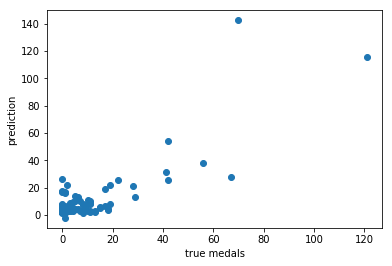

In [14]:
plt.scatter(olympia_2016['true_medals'], olympia_2016['prediction'])
plt.xlabel('true medals')
plt.ylabel('prediction')

lm.coef_

In [15]:
olympia[independent_variables].corr()

,electricity consumption,exports,internet users,oil imports
electricity consumption,1.000000,0.818365,0.961135,0.821660
exports,0.818365,1.000000,0.853678,0.773788
internet users,0.961135,0.853678,1.000000,0.780049
oil imports,0.821660,0.773788,0.780049,1.000000


The problem appears to be that the measures we selected correlate very much among each other, i.e. combining them does not help us very much as they measure to a large extent the same thing (presumably economic development of the country).

### Naive Baseline

How good are we compared to a naïve approach though? A very simple prediction is to predict always the most common value. What is the most common value for medals in the data set?

In [16]:
median_medals = olympia_pre16['medals'].mean()
type(median_medals)
# print("The median medal count is %.0f." % median_medals)

float

Calculate metrics of a model that always predicts the median value.

In [17]:
naive_predictions = [median_medals] * olympia_2016.shape[0]

r2_naive = r2_score(olympia_2016['true_medals'], naive_predictions)
accuracy_naive = accuracy_score(olympia_2016['true_medals'], naive_predictions)
mse_naive = mean_squared_error(olympia_2016['true_medals'], naive_predictions)

print("Naive R2 (variance explained): %.2f" % r2_naive)
print("Naive Accuracy: %.2f" % accuracy_naive)
print("Naive MSE: %.2f" % mse_naive)
print("Ouch! The accuracy is (by definition of the median) much better! %.2f%%!" % (accuracy_naive * 100.0))

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

But the MSE is worse and the variance explained is close to 0. So arguably we are predicting better despite missing most predictions.

### Making the Prediction Better

Can we improve our accuracy? We need to select better features! Let's look at those correlations again.

In [18]:
olympia.corr()['medals'].abs().sort_values(ascending=False)

medals                      1.000000
electricity consumption     0.782745
exports                     0.769728
internet users              0.751845
oil imports                 0.749657
geographic area             0.634710
pop                         0.415016
region                      0.362122
host                        0.304442
gdp per capita              0.283597
population growth rate      0.273188
health expenditures         0.242673
life expectancy at birth    0.241673
gdp_cap                     0.211975
continent                   0.203508
unemployment rate           0.172209
net migration rate          0.088922
public debt                 0.062112
obesity                     0.056740
gross national saving       0.050463
gdp growth rate             0.043479
inflation rate              0.023262
education expenditures      0.019502
military expenditures       0.015251
year                        0.006990
Name: medals, dtype: float64

Earlier we dismissed the medal count as a feature because it is our dependent variable. But we can still use it. Remember that we are trying to predict the medal count for 2016 only. We can use all previous medal counts as a feature. Let's construct an aggregate medal count from the medals won by a country in previous years. 

In [19]:
median_medals_by_country = olympia_pre16.groupby(['country'])[['medals']].median()
median_medals_by_country.rename(columns={'medals': 'medals_median'}, inplace=True)

median_medals_by_country.sample(10)

,medals_median
country,
Vietnam,0.0
Bermuda,0.0
Brunei,0.0
Morocco,2.0
Lebanon,0.0
Uganda,0.0
Zambia,0.0
Guatemala,0.0
Japan,25.0


Let's create a model with our new feature. We can add some of the other high-correlation features as well.

In [20]:
independent_variables2 = ['medals_median', 'exports', 'geographic area', 'region']

training_data2 = olympia_pre16[(['year', 'country'] + dependent_variable + independent_variables2[1:])]
training_data2 = training_data2.merge(median_medals_by_country, how='left', left_on='country', right_index=True)
print("Our new feature has a correlation of %.2f!" % training_data2.corr()['medals']['medals_median'])

Our new feature has a correlation of 0.98!


In [21]:
training_data2.dropna(how='any', inplace=True)
print("There are %d records." % training_data2.shape[0])

lm2 = LinearRegression()
lm2.fit(training_data2[independent_variables2], training_data2[dependent_variable])

training_data2.sample(5)

There are 656 records.


,year,country,medals,exports,geographic area,region,medals_median
217,2004,Costa Rica,0,6.176000e+09,51100.0,6,0.0
163,2000,Cape Verde,0,3.800000e+07,4033.0,5,0.0
710,2012,Panama,0,1.797000e+10,75420.0,6,0.0
342,2004,Georgia,4,6.150000e+08,69700.0,2,6.0
859,2004,Sri Lanka,0,5.269000e+09,65610.0,3,0.0


In [22]:
olympia_2016_2 = olympia[olympia['year'] == 2016][['country', 'medals'] + independent_variables2[1:]]
olympia_2016_2.rename(columns={'medals': 'true_medals'}, inplace=True)
olympia_2016_2.index = range(olympia_2016_2.shape[0])

olympia_2016_2 = olympia_2016_2.merge(median_medals_by_country, how='left', left_on='country', right_index=True)
olympia_2016_2.head()

,country,true_medals,exports,geographic area,region,medals_median
0,Afghanistan,0,3.760000e+08,652230.0,3,1.0
1,Albania,0,2.323000e+09,28748.0,2,0.0
2,Algeria,2,6.825000e+10,2381741.0,4,2.0
3,Antigua and Barbuda,0,5.500000e+07,442.6,6,0.0
4,Armenia,4,1.653000e+09,29743.0,2,2.0


In [23]:
feature_medians2 = olympia_2016_2[independent_variables2].median().to_dict()

olympia_2016_2['prediction'] = lm2.predict(olympia_2016_2[independent_variables2].fillna(feature_medians2))
olympia_2016_2['prediction_rounded'] = [int(round(c)) for c in olympia_2016_2['prediction']]

olympia_2016_2.sample(10)

,country,true_medals,exports,geographic area,region,medals_median,prediction,prediction_rounded
177,Vanuatu,0,4.310000e+07,12189.0,3,0.0,-0.163911,0
111,Montenegro,0,4.892000e+08,13812.0,2,1.0,0.674325,1
100,Malaysia,5,2.310000e+11,329847.0,3,1.0,2.490277,2
179,Vietnam,2,1.290000e+11,331210.0,3,0.0,0.775522,1
119,Niger,1,1.539000e+09,1267000.0,5,0.0,0.098191,0
123,Pakistan,0,2.505000e+10,796095.0,3,0.0,0.009142,0
92,Lesotho,0,9.412000e+08,30355.0,5,0.0,0.109435,0
52,Eritrea,0,4.962000e+08,117600.0,5,0.0,0.105078,0
78,Ireland,2,1.140000e+11,70273.0,1,3.0,3.307558,3
144,Singapore,1,4.100000e+11,697.0,3,0.0,2.835521,3


In [24]:
lm2_r_squared = lm2.score(olympia_2016_2[independent_variables2].fillna(feature_medians2), olympia_2016_2['true_medals'])
lm2_accuracy = accuracy_score(olympia_2016_2['true_medals'], olympia_2016_2['prediction_rounded'])
lm2_mse = mean_squared_error(olympia_2016_2['true_medals'], olympia_2016_2['prediction_rounded'])

print("Linear Regression R2 (variance explained): %.2f" % lm2_r_squared)
print("Linear Regression Accuracy: %.2f" % lm2_accuracy)
print("Linear Regression MSE: %.2f" % lm2_mse)
print("We predicted only %.0f%% correctly!" % (lm2_accuracy * 100.0))

Linear Regression R2 (variance explained): 0.85
Linear Regression Accuracy: 0.54
Linear Regression MSE: 28.50
We predicted only 54% correctly!


The accuracy is about as good as the naive classifier but the varaince explained is much better and the MSE much lower. Success!

Text(0, 0.5, 'prediction')

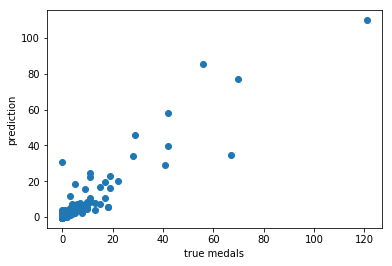

In [25]:
plt.scatter(olympia_2016_2['true_medals'], olympia_2016_2['prediction'])
plt.xlabel('true medals')
plt.ylabel('prediction')